<a href="https://colab.research.google.com/github/Rosangelafl/embaixadoras_inovacao_SUS/blob/master/An%C3%A1lise_SUS_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv

In [120]:
arquivo = open('/content/drive/My Drive/SUS_DADOS/tbEstabelecimento201809.csv', encoding='latin-1')
leitor = csv.reader(arquivo)
print(next(leitor))

['CO_UNIDADE;"CO_CNES";"NU_CNPJ_MANTENEDORA";"TP_PFPJ";"NIVEL_DEP";"NO_RAZAO_SOCIAL";"NO_FANTASIA";"NO_LOGRADOURO";"NU_ENDERECO";"NO_COMPLEMENTO";"NO_BAIRRO";"CO_CEP";"CO_REGIAO_SAUDE";"CO_MICRO_REGIAO";"CO_DISTRITO_SANITARIO";"CO_DISTRITO_ADMINISTRATIVO";"NU_TELEFONE";"NU_FAX";"NO_EMAIL";"NU_CPF";"NU_CNPJ";"CO_ATIVIDADE";"CO_CLIENTELA";"NU_ALVARA";"DT_EXPEDICAO";"TP_ORGAO_EXPEDIDOR";"DT_VAL_LIC_SANI";"TP_LIC_SANI";"TP_UNIDADE";"CO_TURNO_ATENDIMENTO";"CO_ESTADO_GESTOR";"CO_MUNICIPIO_GESTOR";"TO_CHAR(DT_ATUALIZACAO', '\'DD/MM/YYYY\')";"CO_USUARIO";"CO_CPFDIRETORCLN";"REG_DIRETORCLN";"ST_ADESAO_FILANTROP";"CO_MOTIVO_DESAB";"NO_URL";"NU_LATITUDE";"NU_LONGITUDE";"TO_CHAR(DT_ATU_GEO', '\'DD/MM/YYYY\')";"NO_USUARIO_GEO";"CO_NATUREZA_JUR";"TP_ESTAB_SEMPRE_ABERTO";"ST_GERACREDITO_GERENTE_SGIF";"ST_CONEXAO_INTERNET";"CO_TIPO_UNIDADE";"NO_FANTASIA_ABREV";"TP_GESTAO";"TO_CHAR(DT_ATUALIZACAO_ORIGEM', '\'DD/MM/YYYY\')"']


Dimensionando e analisando o SUS com microdados do Datasus. 
Guia para trabalhar com os dados compilados por Rodrigo Silva, do LAIS - Laboratório de Inovação Tecnológica em Saúde [https://github.com/rdsilva], oficina do CodaBr 2018.

In [121]:
import pandas as pd
import numpy as np


Trabalhando com |CNES|Cadastro Nacional de Estabelecimentos de Saúde|Estabelecimentos, Profissionais, Equipamentos, Vínculos, etc

Dimensionando os Estabelecimentos de Saúde, dados outubro de 2018

In [122]:
cnes = pd.read_csv('/content/drive/My Drive/SUS_DADOS/tbEstabelecimento201809.csv', sep=';', encoding='Latin-1',
                   error_bad_lines=False, quotechar='"', low_memory=False, usecols=['CO_UNIDADE', 'CO_CNES','CO_ATIVIDADE','TP_UNIDADE', 'CO_REGIAO_SAUDE', 'TP_UNIDADE', 
                                                                                   'CO_TURNO_ATENDIMENTO', 'CO_MUNICIPIO_GESTOR','TP_ESTAB_SEMPRE_ABERTO','TP_GESTAO'])
cnes.head(2).T


,0,1
CO_UNIDADE,2928707453280,2301307450184
CO_CNES,7453280,7450184
CO_REGIAO_SAUDE,4,20
CO_ATIVIDADE,4,4
TP_UNIDADE,1,74
CO_TURNO_ATENDIMENTO,4,3
CO_MUNICIPIO_GESTOR,292870,230130
TP_ESTAB_SEMPRE_ABERTO,NaN,N
TP_GESTAO,M,M


In [123]:
cnes_red = pd.read_csv('/content/drive/My Drive/SUS_DADOS/tbEstabelecimento201809.csv', sep=';', encoding='Latin-1',
                   error_bad_lines=False, quotechar='"', low_memory=False, usecols=['CO_UNIDADE', 'CO_CNES','CO_ATIVIDADE','TP_UNIDADE', 'CO_REGIAO_SAUDE', 'TP_UNIDADE', 
                                                                                   'CO_TURNO_ATENDIMENTO', 'CO_MUNICIPIO_GESTOR','TP_ESTAB_SEMPRE_ABERTO','TP_GESTAO'])

In [124]:
cnes_red.head()

,CO_UNIDADE,CO_CNES,CO_REGIAO_SAUDE,CO_ATIVIDADE,TP_UNIDADE,CO_TURNO_ATENDIMENTO,CO_MUNICIPIO_GESTOR,TP_ESTAB_SEMPRE_ABERTO,TP_GESTAO
0,2928707453280,7453280,4,4,1,4.0,292870,NaN,M
1,2301307450184,7450184,20,4,74,3.0,230130,N,M
2,2307307462956,7462956,21,4,22,3.0,230730,N,M
3,2313407462476,7462476,13,4,2,3.0,231340,N,M
4,2510107416490,7416490,004,4,71,3.0,251010,N,M


In [125]:
cnes_red.columns

Index(['CO_UNIDADE', 'CO_CNES', 'CO_REGIAO_SAUDE', 'CO_ATIVIDADE',
       'TP_UNIDADE', 'CO_TURNO_ATENDIMENTO', 'CO_MUNICIPIO_GESTOR',
       'TP_ESTAB_SEMPRE_ABERTO', 'TP_GESTAO'],
      dtype='object')

In [126]:
cnes_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364701 entries, 0 to 364700
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CO_UNIDADE              364701 non-null  object 
 1   CO_CNES                 364701 non-null  int64  
 2   CO_REGIAO_SAUDE         192424 non-null  object 
 3   CO_ATIVIDADE            364701 non-null  int64  
 4   TP_UNIDADE              364701 non-null  int64  
 5   CO_TURNO_ATENDIMENTO    364006 non-null  float64
 6   CO_MUNICIPIO_GESTOR     364701 non-null  int64  
 7   TP_ESTAB_SEMPRE_ABERTO  198787 non-null  object 
 8   TP_GESTAO               364701 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 25.0+ MB


In [150]:
cnes_red.rename(columns={'TP_UNIDADE' : 'cod_unidades'}, inplace=True)

In [151]:
cnes_red['cod_unidades'].value_counts()

22    180265
36     55028
2      39253
39     27822
1      11328
4       8770
68      6145
5       5795
42      4769
43      3573
70      3100
50      3048
74      2635
40      1497
81      1304
73      1284
7       1245
71      1200
72      1148
77       750
62       731
15       703
60       695
20       448
80       447
69       409
83       373
76       238
82       139
64       139
21       127
75        89
32        63
78        39
67        38
61        33
79        31
Name: cod_unidades, dtype: int64

Para traduzir o código do Tipo de unidade, temos que ler o arquivo cod_atividade.csv e fazer as correspondências e/ou filtros

In [135]:
codigo_atividade = pd.read_csv('/content/drive/My Drive/SUS_DADOS/cod_atividade.csv', sep=',', quotechar='"', error_bad_lines=False, encoding='utf8')
codigo_atividade

,cod_unidades,descricao,total
0,1,POSTO DE SAUDE,11328
1,2,CENTRO DE SAUDE/UNIDADE BASICA,39253
2,4,POLICLINICA,8770
3,5,HOSPITAL GERAL,5795
4,7,HOSPITAL ESPECIALIZADO,1245
5,15,UNIDADE MISTA,703
6,20,PRONTO SOCORRO GERAL,344
7,21,PRONTO SOCORRO ESPECIALIZADO,127
8,22,CONSULTORIO ISOLADO,180265
9,32,UNIDADE MOVEL FLUVIAL,63


Dropando a coluna total, podemos fazer a contagem. O que interessa é o códigos dos tipos de unidades que não mudam, enquanto o total pode mudar em outro conjunto de dados

In [164]:
codigo_atividade = codigo_atividade.drop(columns='total')
codigo_atividade


,cod_unidades,descricao
0,1,POSTO DE SAUDE
1,2,CENTRO DE SAUDE/UNIDADE BASICA
2,4,POLICLINICA
3,5,HOSPITAL GERAL
4,7,HOSPITAL ESPECIALIZADO
5,15,UNIDADE MISTA
6,20,PRONTO SOCORRO GERAL
7,21,PRONTO SOCORRO ESPECIALIZADO
8,22,CONSULTORIO ISOLADO
9,32,UNIDADE MOVEL FLUVIAL


UNIDADE DE ATENCAO A SAUDE INDIGENA = 72 e UNIDADE MOVEL FLUVIAL = 32
Vamos contar a quantidade de unidades de saúde indígena e o qtd de návios hospitais para a população ribeirinha.

In [153]:
indigena = cnes_red[cnes_red['cod_unidades'] == 72]

In [154]:
indigena.count()

CO_UNIDADE                1148
CO_CNES                   1148
CO_REGIAO_SAUDE            298
CO_ATIVIDADE              1148
cod_unidades              1148
CO_TURNO_ATENDIMENTO      1148
CO_MUNICIPIO_GESTOR       1148
TP_ESTAB_SEMPRE_ABERTO     927
TP_GESTAO                 1148
dtype: int64

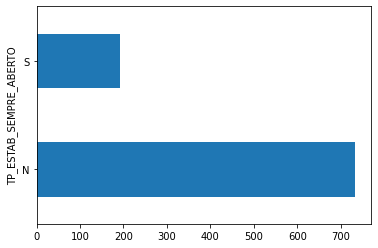

In [155]:
#Quantas unidades de atendimento indigenas tem atendimento 24 horas?
indigena.groupby('TP_ESTAB_SEMPRE_ABERTO').size().sort_values(ascending=False).plot(kind='barh')

In [156]:
indigena['TP_GESTAO'].value_counts()

M    1145
D       2
E       1
Name: TP_GESTAO, dtype: int64

In [158]:
#idem para barcos hospitais
barcos = cnes_red[cnes_red['cod_unidades'] == 32]
barcos

,CO_UNIDADE,CO_CNES,CO_REGIAO_SAUDE,CO_ATIVIDADE,cod_unidades,CO_TURNO_ATENDIMENTO,CO_MUNICIPIO_GESTOR,TP_ESTAB_SEMPRE_ABERTO,TP_GESTAO
818,1501407383436,7383436,001,4,32,4.0,150140,NaN,E
1107,1503305293251,5293251,006,4,32,3.0,150330,N,M
6420,1505807167288,7167288,NaN,4,32,3.0,150580,N,M
6954,1302609222537,9222537,001,4,32,3.0,130260,N,E
7271,1303909184694,9184694,NaN,4,32,5.0,130390,N,M
...,...,...,...,...,...,...,...,...,...
359446,1304209503307,9503307,NaN,4,32,5.0,130420,N,M
360983,1302409451862,9451862,NaN,4,32,4.0,130240,N,M
364003,1302609222553,9222553,001,4,32,3.0,130260,N,E
364555,1301959312544,9312544,NaN,4,32,3.0,130195,N,M


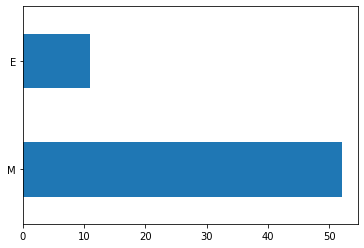

In [159]:
barco['TP_GESTAO'].value_counts().sort_values(ascending=False).plot(kind='barh')

É fácil filtrar para saber a qtd de unidades de saúde por tipo de atendimento.

Merged dos datasets cnes_red e codigo_atividade

In [165]:
#Lembrando as colunas de ambos
cnes_red.columns

Index(['CO_UNIDADE', 'CO_CNES', 'CO_REGIAO_SAUDE', 'CO_ATIVIDADE',
       'cod_unidades', 'CO_TURNO_ATENDIMENTO', 'CO_MUNICIPIO_GESTOR',
       'TP_ESTAB_SEMPRE_ABERTO', 'TP_GESTAO'],
      dtype='object')

In [166]:
codigo_atividade.columns

Index(['cod_unidades', 'descricao'], dtype='object')

In [167]:


df_cnes = pd.merge(cnes_red, codigo_atividade, on='cod_unidades')
df_cnes.head()

,CO_UNIDADE,CO_CNES,CO_REGIAO_SAUDE,CO_ATIVIDADE,cod_unidades,CO_TURNO_ATENDIMENTO,CO_MUNICIPIO_GESTOR,TP_ESTAB_SEMPRE_ABERTO,TP_GESTAO,descricao
0,2928707453280,7453280,4,4,1,4.0,292870,NaN,M,POSTO DE SAUDE
1,2202707466803,7466803,NaN,4,1,4.0,220270,N,M,POSTO DE SAUDE
2,3106207467591,7467591,NaN,4,1,3.0,310620,NaN,M,POSTO DE SAUDE
3,3161107465823,7465823,030,4,1,3.0,316110,NaN,M,POSTO DE SAUDE
4,3504907462484,7462484,17,4,1,3.0,350490,N,M,POSTO DE SAUDE


In [168]:
df_cnes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364562 entries, 0 to 364561
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CO_UNIDADE              364562 non-null  object 
 1   CO_CNES                 364562 non-null  int64  
 2   CO_REGIAO_SAUDE         192370 non-null  object 
 3   CO_ATIVIDADE            364562 non-null  int64  
 4   cod_unidades            364562 non-null  int64  
 5   CO_TURNO_ATENDIMENTO    363867 non-null  float64
 6   CO_MUNICIPIO_GESTOR     364562 non-null  int64  
 7   TP_ESTAB_SEMPRE_ABERTO  198781 non-null  object 
 8   TP_GESTAO               364562 non-null  object 
 9   descricao               364562 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 30.6+ MB


In [171]:
df_cnes['descricao'].value_counts()

CONSULTORIO ISOLADO                                             180265
CLINICA/CENTRO DE ESPECIALIDADE                                  55028
CENTRO DE SAUDE/UNIDADE BASICA                                   39253
UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOLADO)               27822
POSTO DE SAUDE                                                   11328
POLICLINICA                                                       8770
CENTRAL DE GESTAO EM SAUDE                                        6145
HOSPITAL GERAL                                                    5795
UNIDADE MOVEL DE NIVEL PRE-HOSPITALAR NA AREA DE URGENCIA         4769
FARMACIA                                                          3573
CENTRO DE ATENCAO PSICOSSOCIAL                                    3100
UNIDADE DE VIGILANCIA EM SAUDE                                    3048
POLO ACADEMIA DA SAUDE                                            2635
UNIDADE MOVEL TERRESTRE                                           1497
CENTRA

In [175]:
df_cnes.groupby('descricao')['CO_CNES'].value_counts()

descricao                   CO_CNES
CENTRAL DE GESTAO EM SAUDE  14117      1
                            16608      1
                            17620      1
                            22012      1
                            24309      1
                                      ..
UNIDADE MOVEL TERRESTRE     9614478    1
                            9615148    1
                            9617418    1
                            9622136    1
                            9624961    1
Name: CO_CNES, Length: 364562, dtype: int64

Agora vamos focar na atenção especializada e ver quantos leitos existiam no Brasil em outubro 2018(data dos dados)

In [176]:
leitos = pd.read_csv('/content/drive/My Drive/SUS_DADOS/Cópia de rlEstabComplementar201809.csv', sep=';', encoding='Latin-1',
                   error_bad_lines=False, quotechar='"', low_memory=False)
leitos.head()

,CO_UNIDADE,CO_LEITO,CO_TIPO_LEITO,TP_ALTACOMP,QT_EXIST,QT_CONTR,QT_SUS,"TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')",CO_USUARIO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')"
0,5208006587518,32,2,NaN,1,NaN,0,11/06/2013,SMSFSA,10/09/2010
1,5208006587518,42,2,NaN,1,NaN,0,11/06/2013,SMSFSA,10/09/2010
2,5208006587518,45,5,NaN,1,NaN,0,11/06/2013,SMSFSA,10/09/2010
3,5208006587518,48,6,NaN,1,NaN,0,11/06/2013,SMSFSA,10/09/2010
4,3552202708566,81,3,NaN,9,NaN,0,27/07/2018,NLIMA,23/03/2013


In [177]:
leitos.columns.tolist()

['CO_UNIDADE',
 'CO_LEITO',
 'CO_TIPO_LEITO',
 'TP_ALTACOMP',
 'QT_EXIST',
 'QT_CONTR',
 'QT_SUS',
 "TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')",
 'CO_USUARIO',
 "TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')"]

In [186]:
leitos = leitos[['CO_UNIDADE','CO_LEITO','QT_EXIST', 'QT_CONTR', 'QT_SUS']]
leitos.head()

,CO_UNIDADE,CO_LEITO,QT_EXIST,QT_CONTR,QT_SUS
0,5208006587518,32,1,NaN,0
1,5208006587518,42,1,NaN,0
2,5208006587518,45,1,NaN,0
3,5208006587518,48,1,NaN,0
4,3552202708566,81,9,NaN,0


In [187]:
leitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54458 entries, 0 to 54457
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CO_UNIDADE  54458 non-null  object 
 1   CO_LEITO    54458 non-null  int64  
 2   QT_EXIST    54458 non-null  int64  
 3   QT_CONTR    93 non-null     float64
 4   QT_SUS      54458 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ MB


In [188]:
#Abrindo arquivo que descreve o tipo de leito e o tpleito
desc_leito = pd.read_csv('/content/drive/My Drive/SUS_DADOS/tpleitos.csv', sep=',', encoding='Latin-1')
desc_leito

,cod_leito,descricao_leito,tpleito
0,1,BUCO MAXILO FACIAL,INTERNACAO
1,2,CARDIOLOGIA,INTERNACAO
2,3,CIRURGIA GERAL,INTERNACAO
3,4,ENDOCRINOLOGIA,INTERNACAO
4,5,GASTROENTEROLOGIA,INTERNACAO
5,6,GINECOLOGIA,INTERNACAO
6,7,CIRURGICO/DIAGNOSTICO/TERAPEUTICO,REGULACAO
7,8,NEFROLOGIAUROLOGIA,INTERNACAO
8,9,NEUROCIRURGIA,INTERNACAO
9,10,OBSTETRICIA CIRURGICA,URGENCIA


In [193]:
desc_leito.rename(columns={'cod_leito': 'CO_LEITO'}, inplace=True)

In [194]:
desc_leito.columns

Index(['CO_LEITO', 'descricao_leito', 'tpleito'], dtype='object')

In [195]:
df_leitos = leitos.merge(desc_leito, on='CO_LEITO', how='left')

In [196]:
df_leitos.head()

,CO_UNIDADE,CO_LEITO,QT_EXIST,QT_CONTR,QT_SUS,descricao_leito,tpleito
0,5208006587518,32,1,NaN,0,CARDIOLOGIA,AMBULATORIAL
1,5208006587518,42,1,NaN,0,NEUROLOGIA,AMBULATORIAL
2,5208006587518,45,1,NaN,0,PEDIATRIA CLINICA,OUTROS
3,5208006587518,48,1,NaN,0,NaN,NaN
4,3552202708566,81,9,NaN,0,UTI NEONATAL - TIPO II,SADT


In [197]:
df_leitos.isnull().sum()

CO_UNIDADE             0
CO_LEITO               0
QT_EXIST               0
QT_CONTR           54365
QT_SUS                 0
descricao_leito     2373
tpleito             2373
dtype: int64

In [200]:
df_leitos.drop(columns=['QT_CONTR'],inplace=True)

In [ ]:
df_leitos['QT_SUS'].sum()

357192

In [201]:
df_leitos['QT_EXIST'].sum()

547830

In [202]:
df_leitos.groupby('tpleito')['QT_SUS'].sum()

tpleito
AMBULATORIAL           112757
INTERNACAO              78327
OUTROS                  43293
REGULACAO                5483
SADT                    30248
URGENCIA                42928
VIGILANCIA EM SAUDE     11189
Name: QT_SUS, dtype: int64

In [203]:
df_leitos.groupby('tpleito')['QT_EXIST'].sum()

tpleito
AMBULATORIAL           166630
INTERNACAO             126717
OUTROS                  56530
REGULACAO               11805
SADT                    60683
URGENCIA                59308
VIGILANCIA EM SAUDE     13849
Name: QT_EXIST, dtype: int64

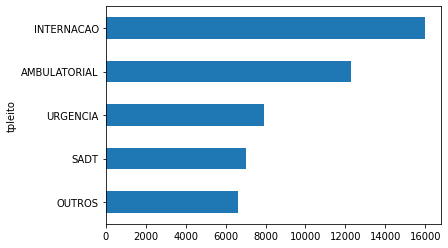

In [205]:
df_leitos.groupby('tpleito')['QT_EXIST'].size().sort_values().tail().plot(kind='barh')

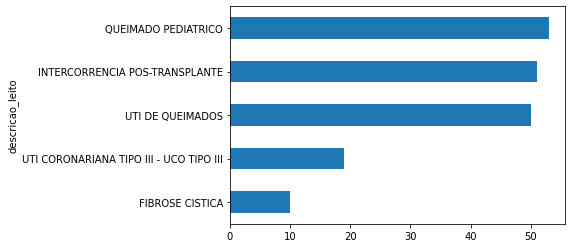

In [206]:
df_leitos.groupby('descricao_leito')['QT_EXIST'].size().sort_values().head().plot(kind='barh')

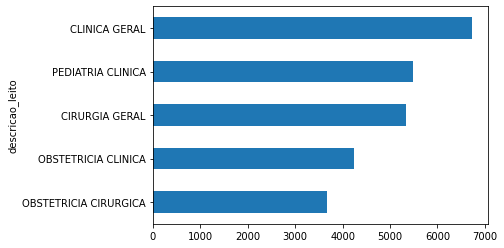

In [207]:
df_leitos.groupby('descricao_leito')['QT_EXIST'].size().sort_values().tail().plot(kind='barh')

In [209]:
df_cnes.columns

Index(['CO_UNIDADE', 'CO_CNES', 'CO_REGIAO_SAUDE', 'CO_ATIVIDADE',
       'cod_unidades', 'CO_TURNO_ATENDIMENTO', 'CO_MUNICIPIO_GESTOR',
       'TP_ESTAB_SEMPRE_ABERTO', 'TP_GESTAO', 'descricao'],
      dtype='object')

In [210]:
df_leitos.columns

Index(['CO_UNIDADE', 'CO_LEITO', 'QT_EXIST', 'QT_SUS', 'descricao_leito',
       'tpleito'],
      dtype='object')

In [211]:
df_final = pd.merge(df_cnes, df_leitos, on='CO_UNIDADE')

In [212]:
df_final.head()

,CO_UNIDADE,CO_CNES,CO_REGIAO_SAUDE,CO_ATIVIDADE,cod_unidades,CO_TURNO_ATENDIMENTO,CO_MUNICIPIO_GESTOR,TP_ESTAB_SEMPRE_ABERTO,TP_GESTAO,descricao,CO_LEITO,QT_EXIST,QT_SUS,descricao_leito,tpleito
0,3303307383851,7383851,NaN,4,36,3.0,330330,S,M,CLINICA/CENTRO DE ESPECIALIDADE,33,1,0,CLINICA GERAL,AMBULATORIAL
1,3303307384920,7384920,NaN,4,36,4.0,330330,S,M,CLINICA/CENTRO DE ESPECIALIDADE,33,1,0,CLINICA GERAL,AMBULATORIAL
2,3202207394780,7394780,NaN,4,36,6.0,320220,S,M,CLINICA/CENTRO DE ESPECIALIDADE,47,60,0,NaN,NaN
3,1500805994047,5994047,NaN,4,36,3.0,150080,NaN,M,CLINICA/CENTRO DE ESPECIALIDADE,1,1,0,BUCO MAXILO FACIAL,INTERNACAO
4,3304557473699,7473699,NaN,4,36,6.0,330455,NaN,M,CLINICA/CENTRO DE ESPECIALIDADE,74,21,0,UTI ADULTO - TIPO I,SADT


In [213]:
df_final.columns

Index(['CO_UNIDADE', 'CO_CNES', 'CO_REGIAO_SAUDE', 'CO_ATIVIDADE',
       'cod_unidades', 'CO_TURNO_ATENDIMENTO', 'CO_MUNICIPIO_GESTOR',
       'TP_ESTAB_SEMPRE_ABERTO', 'TP_GESTAO', 'descricao', 'CO_LEITO',
       'QT_EXIST', 'QT_SUS', 'descricao_leito', 'tpleito'],
      dtype='object')

In [216]:
#verificando a quantidade de leitos em hospitais gerais
hospitais = df_final[df_final['cod_unidades'] == 5]
hospitais.head(3)


,CO_UNIDADE,CO_CNES,CO_REGIAO_SAUDE,CO_ATIVIDADE,cod_unidades,CO_TURNO_ATENDIMENTO,CO_MUNICIPIO_GESTOR,TP_ESTAB_SEMPRE_ABERTO,TP_GESTAO,descricao,CO_LEITO,QT_EXIST,QT_SUS,descricao_leito,tpleito
860,4312905230241,5230241,5CRS,4,5,4.0,431290,S,M,HOSPITAL GERAL,33,14,6,CLINICA GERAL,AMBULATORIAL
861,4312905230241,5230241,5CRS,4,5,4.0,431290,S,M,HOSPITAL GERAL,10,1,1,OBSTETRICIA CIRURGICA,URGENCIA
862,4312905230241,5230241,5CRS,4,5,4.0,431290,S,M,HOSPITAL GERAL,45,2,2,PEDIATRIA CLINICA,OUTROS


In [219]:
hospitais['QT_EXIST'].sum()

423194

In [220]:
hospitais['descricao_leito'].value_counts().sort_values(ascending=False)

CLINICA GERAL                                        5450
CIRURGIA GERAL                                       4739
PEDIATRIA CLINICA                                    4480
OBSTETRICIA CLINICA                                  3542
OBSTETRICIA CIRURGICA                                3238
UNIDADE ISOLAMENTO                                   1632
GINECOLOGIA                                          1536
ORTOPEDIATRAUMATOLOGIA                               1442
CARDIOLOGIA                                          1363
UTI ADULTO - TIPO II                                 1126
PEDIATRIA CIRURGICA                                   959
ONCOLOGIA                                             897
NEFROLOGIAUROLOGIA                                    729
PLASTICA                                              696
NEFROUROLOGIA                                         659
NEUROCIRURGIA                                         651
OTORRINOLARINGOLOGIA                                  648
NEUROLOGIA    

In [223]:
hospitais.groupby('descricao_leito')['QT_EXIST'].sum().sort_values(ascending=False)

descricao_leito
CLINICA GERAL                                        118170
CIRURGIA GERAL                                        61434
PEDIATRIA CLINICA                                     39982
OBSTETRICIA CIRURGICA                                 24886
OBSTETRICIA CLINICA                                   23248
UTI ADULTO - TIPO II                                  16876
ORTOPEDIATRAUMATOLOGIA                                16400
CARDIOLOGIA                                           10808
UTI ADULTO - TIPO I                                    7219
CRONICOS                                               7168
ONCOLOGIA                                              7089
GINECOLOGIA                                            6471
NEUROCIRURGIA                                          4710
UTI ADULTO - TIPO III                                  4541
UTI NEONATAL - TIPO II                                 4504
PEDIATRIA CIRURGICA                                    4374
CIRURGICO/DIAGNOSTICO/TE

In [224]:
hospitais.groupby('descricao_leito')['QT_SUS'].sum().sort_values(ascending=False)

descricao_leito
CLINICA GERAL                                        81953
CIRURGIA GERAL                                       37956
PEDIATRIA CLINICA                                    31150
OBSTETRICIA CLINICA                                  17699
OBSTETRICIA CIRURGICA                                16621
ORTOPEDIATRAUMATOLOGIA                               12507
UTI ADULTO - TIPO II                                 10582
CARDIOLOGIA                                           6039
CRONICOS                                              5882
ONCOLOGIA                                             4400
GINECOLOGIA                                           3901
NEUROCIRURGIA                                         3281
PEDIATRIA CIRURGICA                                   3062
UTI NEONATAL - TIPO II                                3003
UNIDADE ISOLAMENTO                                    2875
NEUROLOGIA                                            2587
AIDS                                    